# Document Clustering Through Topic Modeling (LDA)

I am copying a small introduction to LDA, by Joseph Bradley Posted in ENGINEERING BLOG March 25, 2015

Topic models automatically infer the topics discussed in a collection of documents. These topics can be used to summarize and organize documents, or used for featurization and dimensionality reduction in later stages of a Machine Learning (ML) pipeline.

At a high level, topic modeling aims to find structure within an unstructured collection of documents. After learning this “structure,” a topic model can answer questions such as: What is document X discussing? How similar are documents X and Y? If I am interested in topic Z, which documents should I read first?

Topic modeling is a very broad field. Latent Dirichlet Allocation (LDA), arguably the most successful topic model to date. Initially developed for both text analysis and population genetics, LDA has since been extended and used in many applications from time series to image analysis. First, let’s describe LDA in terms of text analysis.

What are topics? LDA is not given topics, so it must infer them from raw text. LDA defines a topic as a distribution over words. We will soon see what it means.

In addition to inferring these topics, LDA infers a distribution over topics for each document.  E.g., document X might be 60% about “space exploration,” 30% about “computers” and 10% about other topics.

These topic distributions can be used in many ways:

1) Clustering: Topics are cluster centers and documents are associated with multiple clusters (topics).  This clustering can help organize or summarize document collections.

2) Feature generation: LDA can generate features for other ML algorithms to use.  As mentioned above, LDA infers a distribution over topics for each document; with K topics, this gives K numerical features.  These features can then be plugged into algorithms such as Logistic Regression or Decision Trees for prediction tasks.

3) Dimensionality reduction: Each document’s distribution over topics gives a concise summary of the document.  Comparing documents in this reduced feature space can be more meaningful than comparing in the original feature space of words.


------------------------------------------------------------------------------------------------------------------------------
NOTE: Parallelization of LDA algorithm is not straightforward. It has recently been introduced in spark, but its still an experimental feature and after researching a lot, I realized that all the functionalities are still not available in the python API pyspark.

# Code Example

Importing Libraries

In [1]:
from __future__ import division, print_function
from time import time
import numpy as np
import sklearn.feature_extraction.text as text
import lda
import pandas as pd

Initializing a few variables

In [3]:
n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20

Reading data

In [4]:
docs = pd.read_csv('Documents/docs.csv')
titles = tuple(docs.values.tolist())
tests = docs.ix[:,1].values.tolist()

Lets have a look at the data

In [45]:
from IPython.display import display, HTML
display(docs.head(5))

,id,steps
0,1,\nFTP the payment *** in below directory.\n\nV...
1,2,\nUpload the payment file through ***\nVerify ...
2,3,\nUpload the payment file through *** Portal\n...
3,4,\nUpload the payment file through ***\nVerify ...
4,5,Upload the payment file through ***\nVerify wh...


Creating a Document Term Matrix to be used by LDA

In [5]:
tf_vectorizer = text.CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
tf = tf_vectorizer.fit_transform(tests)
vocab = tf_vectorizer.get_feature_names()

Initialing and training the model (as the documents are very small and we only have 40 documents, we will be initiating the model with 10 topics)

In [6]:
model = lda.LDA(n_topics=10, n_iter=500, random_state=1)
model.fit(tf)

Let's have a look at the different topics and their constituting words

In [7]:
topic_word = model.topic_word_
n = 5
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]
    print('*Topic {}\n- {}'.format(i, ', '.join(topic_words)))

*Topic 0
- recreated, rules, updated, characters, properly
*Topic 1
- select, transaction, batc_seq_nu, status, successfully
*Topic 2
- file, complete, table, check, inbound
*Topic 3
- created, ad, generated, ack, bansta
*Topic 4
- file, payment, status, trans, populated
*Topic 5
- batch, using, file, following, processed
*Topic 6
- trigger, verity, check, map, archived
*Topic 7
- table, acrchived, received, control, header
*Topic 8
- statement, tag, 61, values, xxx
*Topic 9
- file, table, payment, recreated, select


The code below prints each document along with the most likely topic.

In [8]:
doc_topic = model.doc_topic_
for n in range(40):
    topic_most_pr = doc_topic[n].argmax()
    print("\ndoc: {} topic: {}\n{}...".format(n,
                                            topic_most_pr,
                                            titles[n][:50]))


doc: 0 topic: 9
[1, '\nFTP the payment *** in below directory.\n\nVerify that a record is created in *** Table with Reference_Number as ***\nVerify in *** table that the file is processed and recreated successfully.\n\nSql: Select   from *** where *** = <file_seq_nu>\nVerify in *** that the Control file get generated.\n\nSql: Select   from *** where *** = <batc_seq_nu>\nUsing following query verify that the correct Logical File Name will be present in the file:\n\nSql: Select   from *** where *** = <archive_data_seq_nu  from Record -2>.\n']...

doc: 1 topic: 7
[2, '\nUpload the payment file through ***\nVerify whether the file is loaded in *** table\nVerify the *** Table that the trans status is populated as U\nVerify whether the file is acrchived in *** table\nVerify whether the file is acrchived in AD ***\nVerify the *** are same in the *** header and in the recreated file\nVerify whether the positive control received from ***.\n\n']...

doc: 2 topic: 7
[3, "\nUpload the payment fil

# Visualizations

The code below shows the probability of each word in our vocabulary to be in topics: 0, 3, 6 and 9.

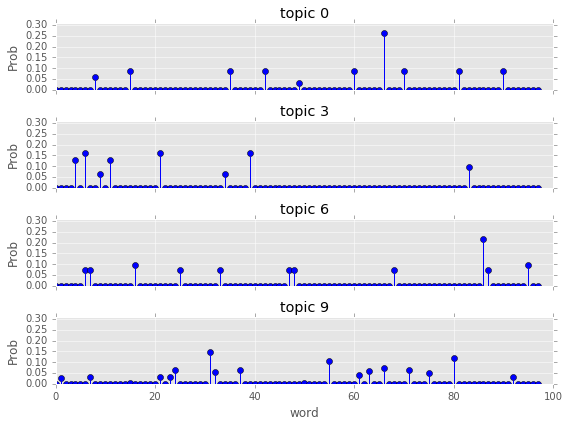

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# use matplotlib style sheet
try:
    plt.style.use('ggplot')
except:
    # version of matplotlib might not be recent
    pass

f, ax= plt.subplots(4, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([0, 3, 6, 9]):
    ax[i].stem(topic_word[k,:], linefmt='b-',
               markerfmt='bo', basefmt='w-')
    ax[i].set_xlim(0,100)
    ax[i].set_ylim(0, 0.31)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("topic {}".format(k))

ax[3].set_xlabel("word")

plt.tight_layout()
plt.show()

This shows the probability of the 10 topics for documents: 1, 3, 4, 8 and 9. 

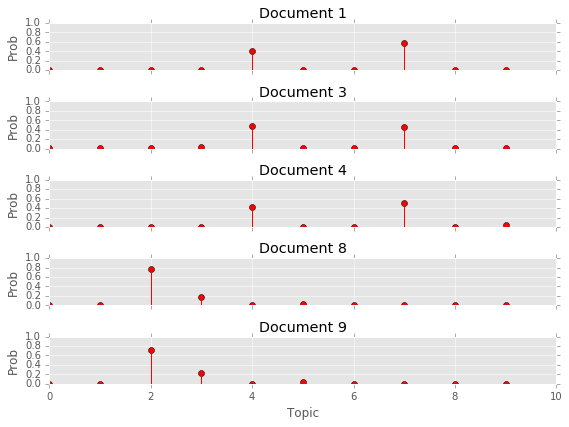

In [23]:
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([1, 3, 4, 8, 9]):
    ax[i].stem(doc_topic[k,:], linefmt='r-',
               markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(0, 10)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("Document {}".format(k))

ax[4].set_xlabel("Topic")

plt.tight_layout()
plt.show()

This shows the distribution of the documents over the 10 topics

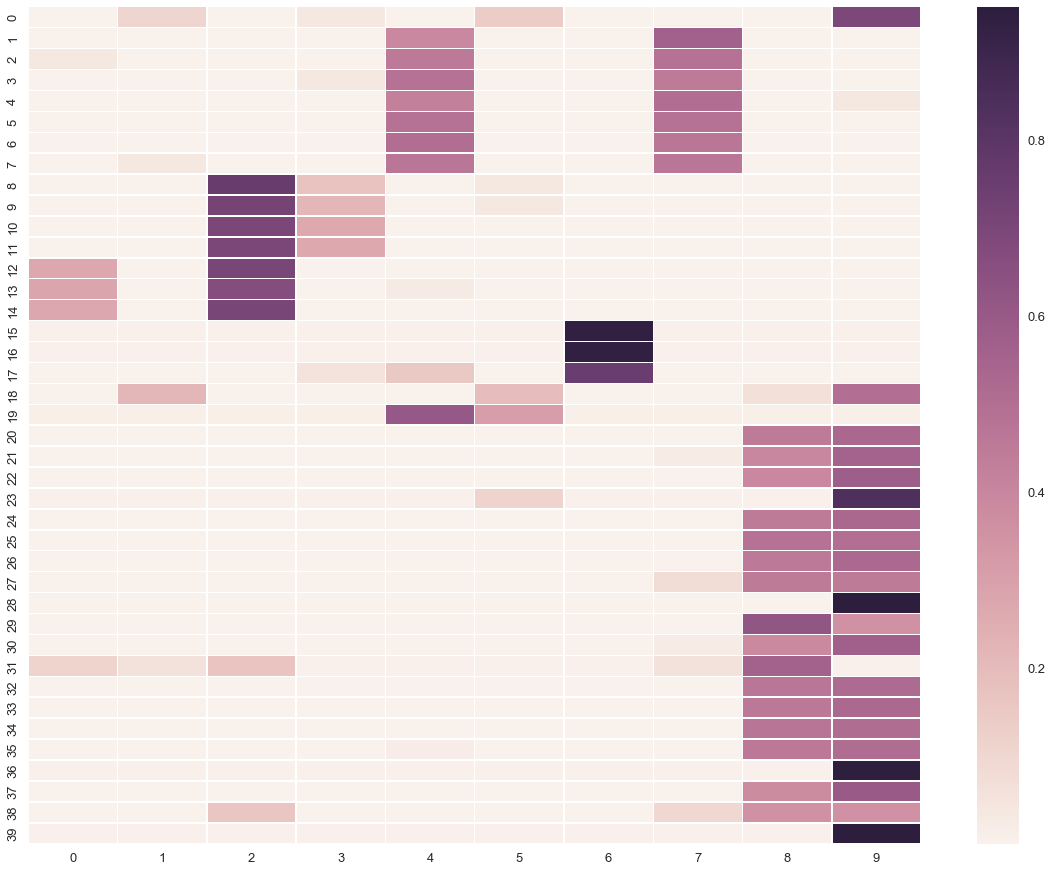

In [50]:
import seaborn as sns
sns.set()
sns.set_context("talk")
plt.figure(figsize=(20, 15))
ax = sns.heatmap(doc_topic, linewidths=.5)